<a href="https://colab.research.google.com/github/githublin26/tibame0826/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://en.wikibooks.org/wiki/LaTeX/Mathematics

$   area =  \frac{1}{x_1^2+1} $

$  \pi \sum P(i,j) $

In [1]:
#整理資料都用Pandas
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
df=pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"]=boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index=False)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 進到機器學習使用numpy
import numpy as np
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])


In [3]:
# 把你的資料切成 訓練資料/測試資料
from sklearn.model_selection import train_test_split
train_test_split(x,y, test_size=0.1)
# 90%x, 10%x, 90%y, 10%y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [4]:
#把資料丟給演算法做學習(fit)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5)

[Text(0.5372340425531915, 0.9166666666666666, 'RM <= 6.92\nsquared_error = 86.208\nsamples = 455\nvalue = 22.653'),
 Text(0.25, 0.75, 'LSTAT <= 14.4\nsquared_error = 40.819\nsamples = 384\nvalue = 19.968'),
 Text(0.09574468085106383, 0.5833333333333334, 'DIS <= 1.385\nsquared_error = 26.227\nsamples = 230\nvalue = 23.432'),
 Text(0.0425531914893617, 0.4166666666666667, 'B <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.02127659574468085, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.06382978723404255, 0.25, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.14893617021276595, 0.4166666666666667, 'RM <= 6.543\nsquared_error = 13.93\nsamples = 225\nvalue = 22.94'),
 Text(0.10638297872340426, 0.25, 'LSTAT <= 7.555\nsquared_error = 7.182\nsamples = 175\nvalue = 21.682'),
 Text(0.0851063829787234, 0.08333333333333333, 'squared_error = 2.758\nsamples = 38\nvalue = 24.053'),
 Text(0.1276595744680851, 0.08333333333333333, 'squared_error = 6.

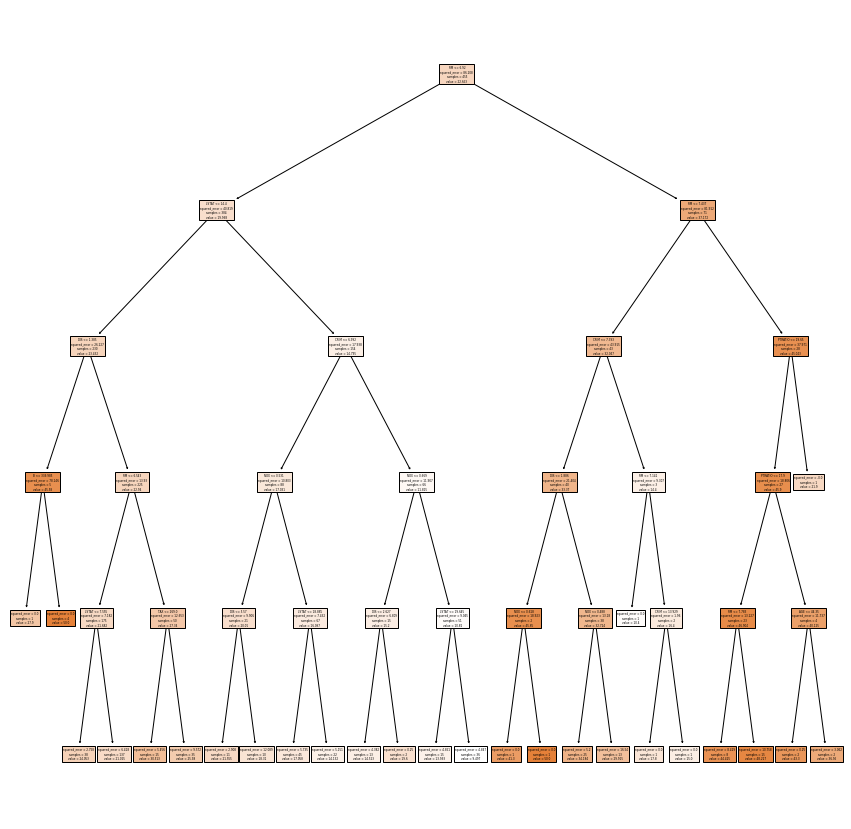

In [5]:
#把學習成果畫出來
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(reg, 
          feature_names=boston["feature_names"], 
          
          filled=True)


In [ ]:
#預測模型表現如何(看模型的參數表現如何)
from sklearn.metrics import accuracy_score
pre =clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333